# Reading points from a file and produce a graph

In [2]:
from ROOTaaS.iPyROOT import ROOT
ROOT.toCpp()

Welcome to ROOTaas Beta


Notebook is in Cpp mode


Let's inspect the input file, which is in the appropriate format for filling a TGraphErrors

In [3]:
.! cat macro2_input.txt

# Measurement of Friday 26 March
# Experiment 2 Physics Lab

1   6   5
2   12  5
3   14  4.7
4   20  4.5
5   22  4.2
6   24  5.1
7   35  2.9
8   45  4.1
9   44  4.8
10  53  5.43

Now, let's start with the creation of the graphs as well as some beautification

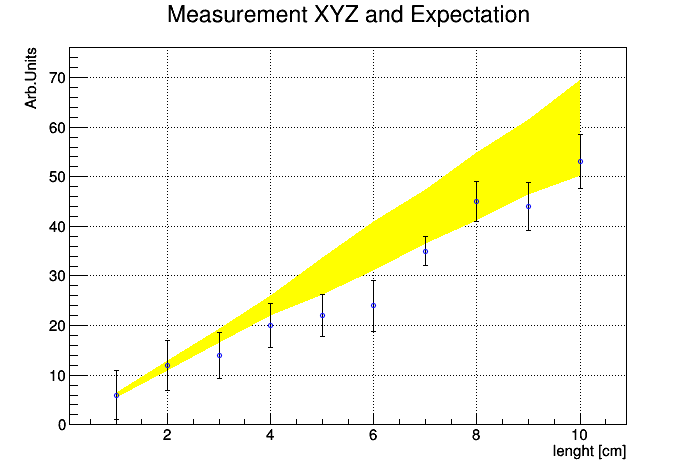

In [4]:
auto c=new TCanvas();c->SetGrid();
TGraphErrors graph_expected("./macro2_input_expected.txt","%lg %lg %lg");
graph_expected.SetTitle("Measurement XYZ and Expectation;lenght [cm];Arb.Units");
graph_expected.SetFillColor(kYellow);
graph_expected.DrawClone("E3AL"); // E3 draws the band

TGraphErrors graph("./macro2_input.txt","%lg %lg %lg");
graph.SetMarkerStyle(kCircle);
graph.SetFillColor(0);
graph.DrawClone("PESame");

We add a legend to improve the clarity of the plot. It is always reccomended to make the plot "self descriptive".

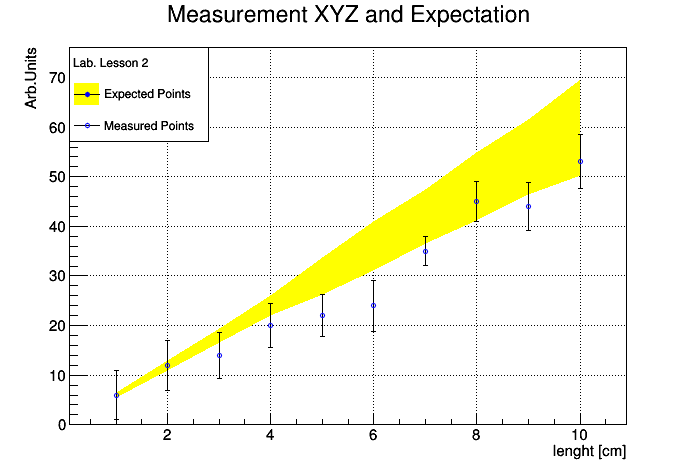

In [5]:
TLegend leg(.1,.7,.3,.9,"Lab. Lesson 2");
leg.SetFillColor(0);
leg.AddEntry(&graph_expected,"Expected Points");                                                                                          
leg.AddEntry(&graph,"Measured Points");                                                                                                   
leg.DrawClone("Same");